In [69]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.arima.model import ARIMA

In [70]:
#폰트 설정 
matplotlib.rc("font", family = "Malgun Gothic")
matplotlib.rc("axes", unicode_minus = False)

In [62]:
df

가입일자
2018-12-31     98
2019-01-01    211
2019-01-02    276
2019-01-03    204
2019-01-04    216
             ... 
2019-12-25     94
2019-12-26    140
2019-12-27     96
2019-12-28    111
2019-12-29     39
Name: 고객번호, Length: 364, dtype: int64

In [71]:
df = pd.read_csv("C:/Users/user/Desktop/A2_유아용품/멤버데이터가입일월추가.csv", parse_dates=['가입일자'], encoding= 'euc-kr')
df

,Unnamed: 0,고객번호,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,가입일자,가입월
0,0,201812310749735,여,기혼,인천,37.0,국민은행,인스타그램,Yes,2018-12-31,12월
1,71,201812310749988,여,기혼,부산,29.0,대구은행,네이버카페,Yes,2018-12-31,12월
2,70,201812310749984,남,기혼,경기,33.0,국민은행,인스타그램,Yes,2018-12-31,12월
3,69,201812310749982,여,기혼,부산,33.0,새마을금고,인스타그램,Yes,2018-12-31,12월
4,68,201812310749980,여,기혼,서울,36.0,신한카드,검색광고,Yes,2018-12-31,12월
...,...,...,...,...,...,...,...,...,...,...,...
81089,81069,201912291058061,여,기혼,대구,32.0,국민은행,네이버블로그,Yes,2019-12-29,12월
81090,81070,201912291058064,여,기혼,경기,33.0,롯데카드,지인추천,Yes,2019-12-29,12월
81091,81071,201912291058070,여,미혼,대전,31.0,농협중앙회,인스타그램,No,2019-12-29,12월
81092,81073,201912291058094,여,미혼,인천,31.0,농협중앙회,네이버블로그,No,2019-12-29,12월


In [64]:
df = df.groupby('가입일자').count()['고객번호']
df

가입일자
2018-12-31     98
2019-01-01    211
2019-01-02    276
2019-01-03    204
2019-01-04    216
             ... 
2019-12-25     94
2019-12-26    140
2019-12-27     96
2019-12-28    111
2019-12-29     39
Name: 고객번호, Length: 364, dtype: int64

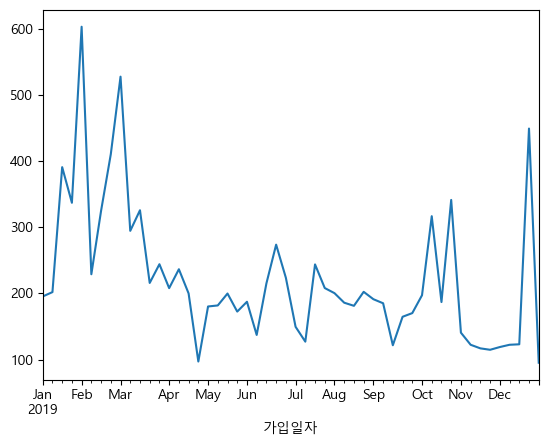

In [68]:
y = df.resample('1W').mean()
y.plot()
plt.savefig('주간가입일자.png')

In [67]:
y

가입일자
2019-01-06    195.285714
2019-01-13    201.857143
2019-01-20    390.714286
2019-01-27    336.857143
2019-02-03    602.857143
2019-02-10    228.857143
2019-02-17    324.714286
2019-02-24    410.285714
2019-03-03    527.428571
2019-03-10    294.428571
2019-03-17    325.571429
2019-03-24    215.714286
2019-03-31    244.000000
2019-04-07    207.857143
2019-04-14    236.428571
2019-04-21    199.857143
2019-04-28     97.000000
2019-05-05    180.142857
2019-05-12    181.714286
2019-05-19    199.714286
2019-05-26    172.428571
2019-06-02    187.285714
2019-06-09    137.142857
2019-06-16    215.000000
2019-06-23    273.571429
2019-06-30    223.571429
2019-07-07    149.428571
2019-07-14    127.000000
2019-07-21    243.714286
2019-07-28    208.000000
2019-08-04    200.285714
2019-08-11    185.857143
2019-08-18    181.142857
2019-08-25    202.285714
2019-09-01    191.142857
2019-09-08    185.000000
2019-09-15    121.571429
2019-09-22    164.571429
2019-09-29    170.142857
2019-10-06    197.14

In [47]:
df_diff2 = df - 2 * df.shift(1)+df.shift(2)

df_diff2 =df_diff2.dropna()


In [48]:
df_diff1 = df - df.shift(1)

df_diff1 = df_diff1.dropna()

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


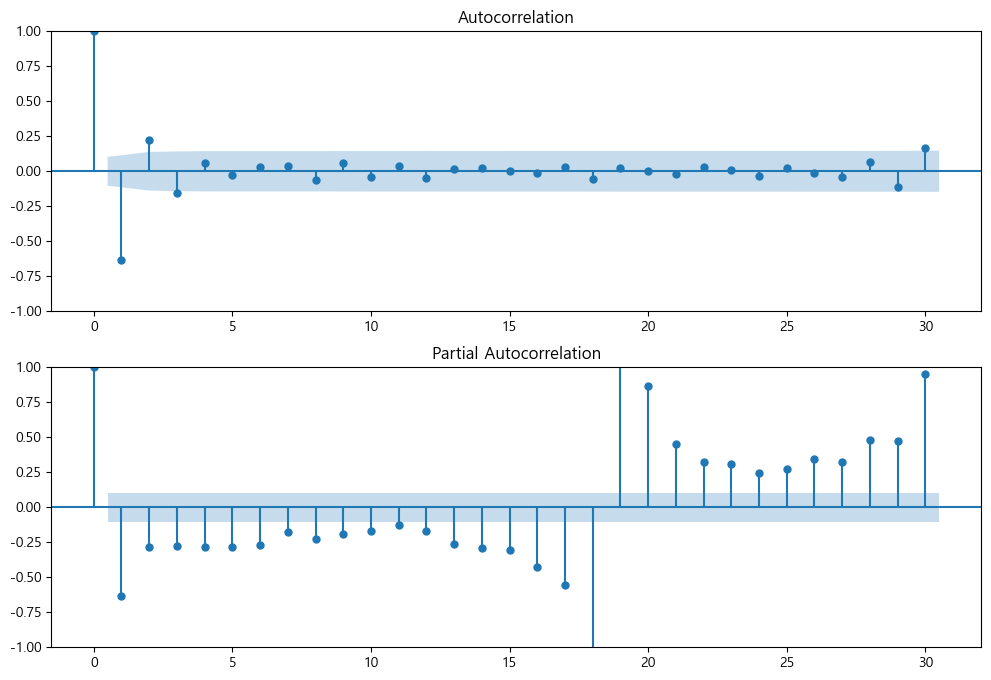

In [49]:
lag_size = 30
fig = plt.figure(figsize= (12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df_diff2,lags=lag_size, ax= ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df_diff2,lags=lag_size, ax= ax2)

In [51]:
train_size = 0.9
len_idx = len(df.index)
mask = (np.arange(len_idx)/len_idx)<train_size
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [52]:
df_train = df[mask]
df_test = df[~mask]
df_test

가입일자
2019-11-24     132
2019-11-25     140
2019-11-26     129
2019-11-27     143
2019-11-28     123
2019-11-29     102
2019-11-30      91
2019-12-01     104
2019-12-02     116
2019-12-03     110
2019-12-04     135
2019-12-05     138
2019-12-06     125
2019-12-07     111
2019-12-08     121
2019-12-09     112
2019-12-10     127
2019-12-11     129
2019-12-12     113
2019-12-13     127
2019-12-14     123
2019-12-15     130
2019-12-16     108
2019-12-17    1342
2019-12-18     730
2019-12-19     636
2019-12-20     138
2019-12-21     108
2019-12-22      81
2019-12-23      97
2019-12-24      89
2019-12-25      94
2019-12-26     140
2019-12-27      96
2019-12-28     111
2019-12-29      39
Name: 고객번호, dtype: int64

NameError: name 'df_train' is not defined

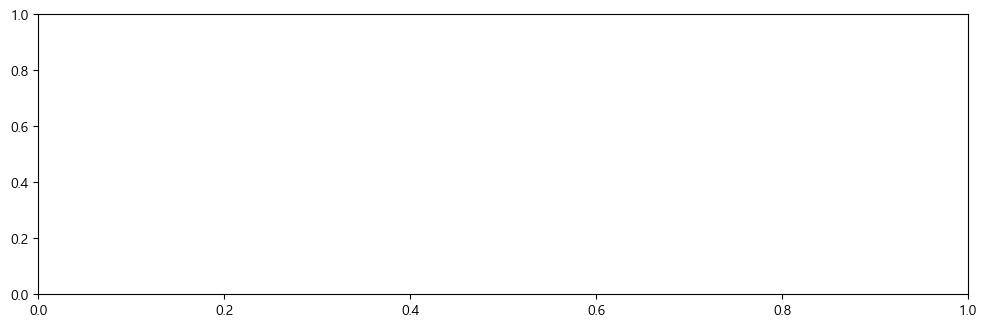

In [23]:
lag_size = 30
fig = plt.figure(figsize= (12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df_train,lags=lag_size, ax= ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df_train,lags=lag_size, ax= ax2)

<AxesSubplot: xlabel='가입일자'>

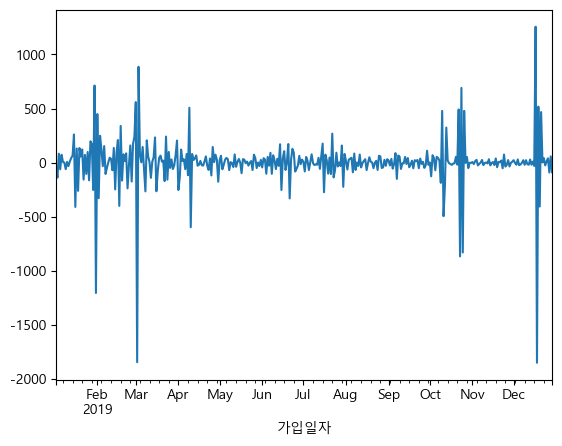

In [53]:
df_diff2.plot()

In [54]:
from pmdarima.arima import auto_arima
from pmdarima.arima import arima
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools
from tqdm import tqdm

In [55]:
auto_arima(df_train)

ARIMA(order=(3, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
zz2.plot()

In [57]:
model = ARIMA(df_train, order=(0,0,0))
results_ARIMA = model.fit()
print(results_ARIMA.summary())

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   고객번호   No. Observations:                  328
Model:                          ARIMA   Log Likelihood               -2086.032
Date:                Wed, 16 Nov 2022   AIC                           4176.064
Time:                        17:04:50   BIC                           4183.650
Sample:                    12-31-2018   HQIC                          4179.091
                         - 11-23-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        227.4515     11.826     19.233      0.000     204.272     250.630
sigma2      1.957e+04    646.177     30.285      0.000    1.83e+04    2.08e+04
Ljung-Box (L1) (Q):                 116.29   Jarque-

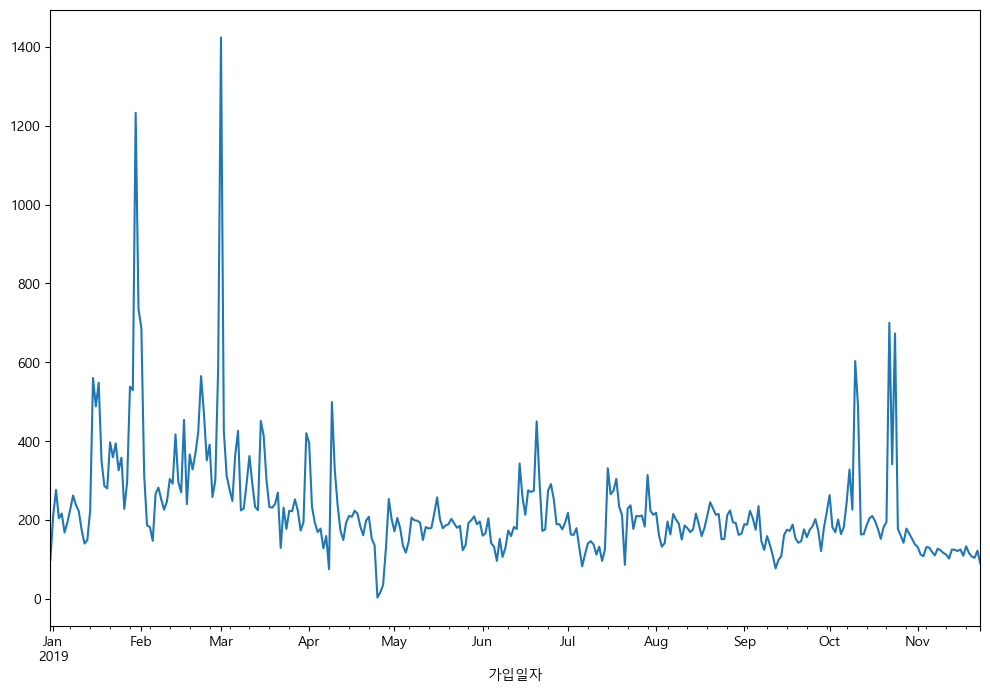

In [58]:
start_time = df_test.index.min()
end_time = df_test.index.max()
fig, ax = plt.subplots(figsize = (12,8))
ax = df_train.plot(ax=ax)
fig = results_ARIMA.predict(start = start_time, end = end_time)


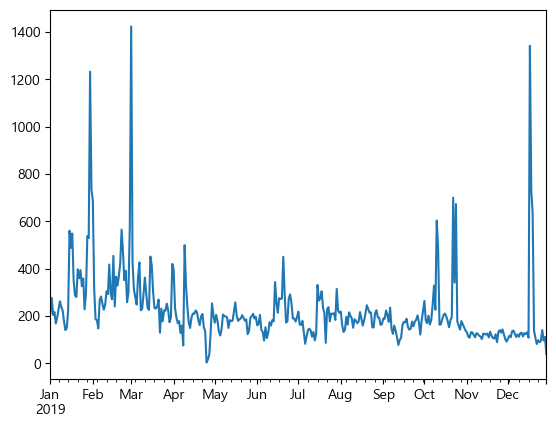

In [145]:
df.plot()
plt.savefig('일별가입자시계열.png')